In [1]:
# FFT-ICA-MixtureDetection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from sklearn.decomposition import FastICA

In [3]:
# Generate two signals with different frequencies
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration

# Two sine waves at different frequencies
f1, f2 = 50, 150  # Frequencies in Hz
signal1 = np.sin(2 * np.pi * f1 * t)  # First signal
signal2 = np.sin(2 * np.pi * f2 * t)  # Second signal

# Mix the signals (simulate received signal with interference)
mixed_signal = signal1 + signal2

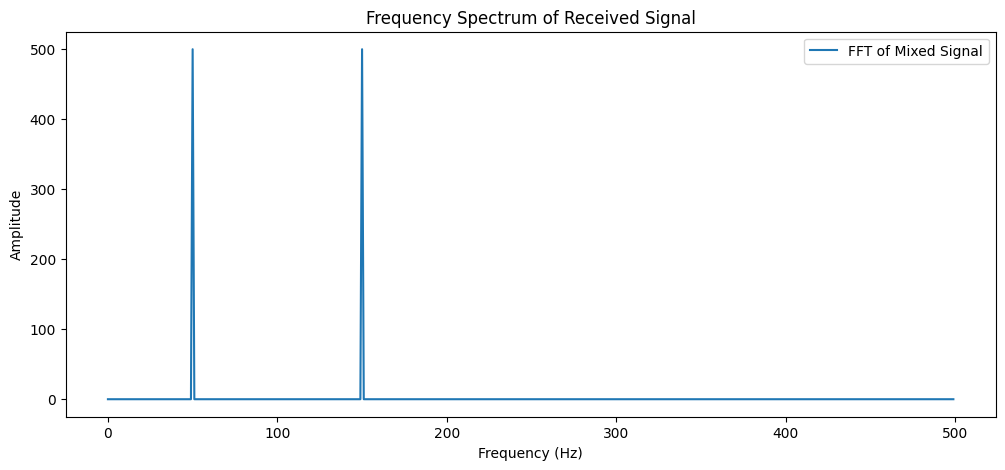

In [4]:
# FFT Analysis to detect multiple frequencies
fft_result = np.abs(fft(mixed_signal))[:fs//2]  # One-sided FFT
freqs = np.fft.fftfreq(fs, d=1/fs)[:fs//2]

# Plot FFT to visualize frequency components
plt.figure(figsize=(12, 5))
plt.plot(freqs, fft_result, label="FFT of Mixed Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum of Received Signal")
plt.legend()
plt.show()


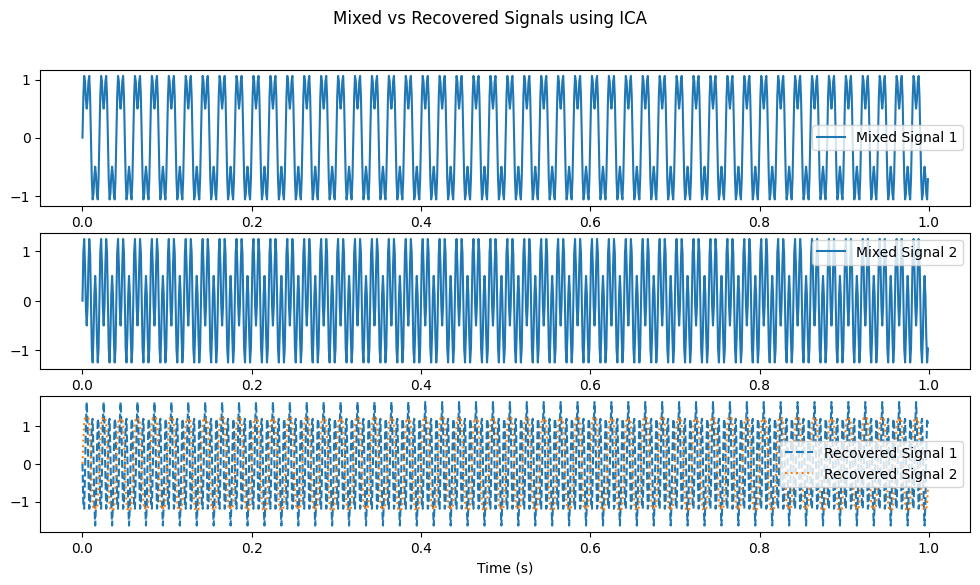

In [5]:
# Blind Source Separation using ICA
X = np.c_[signal1, signal2]  # Create a dataset with original signals
A = np.array([[1, 0.5], [0.5, 1]])  # Mixing matrix
X_mixed = X @ A.T  # Mixed signals

# Apply ICA to separate sources
ica = FastICA(n_components=2)
signals_recovered = ica.fit_transform(X_mixed)  # Recovered signals

# Plot original vs recovered signals
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, X_mixed[:, 0], label="Mixed Signal 1")
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(t, X_mixed[:, 1], label="Mixed Signal 2")
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(t, signals_recovered[:, 0], label="Recovered Signal 1", linestyle="dashed")
plt.plot(t, signals_recovered[:, 1], label="Recovered Signal 2", linestyle="dotted")
plt.legend()
plt.xlabel("Time (s)")
plt.suptitle("Mixed vs Recovered Signals using ICA")
plt.show()
